len(biglinestring) 82
len(line_segments) 81
ele is not a valid column in input nodes. Ignoring this column.
timestamp is not a valid column in input nodes. Ignoring this column.
sat is not a valid column in input nodes. Ignoring this column.
Empty GeoDataFrame
Columns: [id, time, phenomenons, geometry]
Index: []


<Axes: >

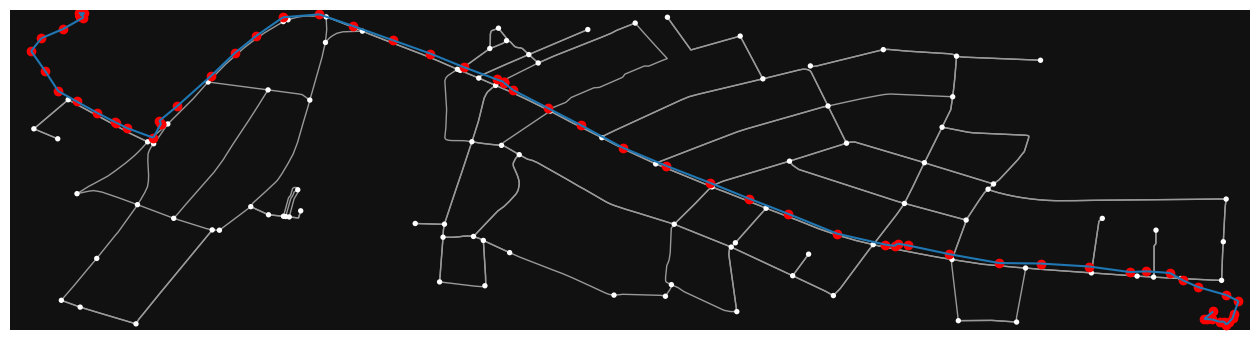

In [1]:
import requests
import json

import pandas as pd
import geopandas as gpd
from shapely.geometry import shape
import osmnx as ox
import networkx as nx

from algorithms import mm_utils

# Download trajectory data from envirocar
url = "https://envirocar.org/api/stable/tracks/52f3836be4b0d8e8c27ed6f0"
response = requests.get(url)
data = json.loads(response.text)

# Convert the trajectory data into a GeoDataFrame
geometries = []
attributes = []
for feature in data['features']:
    geometry = shape(feature['geometry'])
    geometries.append(geometry)
    attributes.append(feature['properties'])

gdf = gpd.GeoDataFrame(data=attributes, geometry=geometries)

# Get the bounding box
bbox = gdf.total_bounds

# 'total_bounds' returns a tuple with (minx, miny, maxx, maxy) values
minx, miny, maxx, maxy = bbox

G=nx.Graph()

# Download a map by specifying the boundary box
# and draw the graph
G = ox.graph.graph_from_bbox(maxy, miny, maxx, minx, network_type='drive') # The order is north, south, east, west [https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.graph.graph_from_bbox]
fig, ax = ox.plot_graph(G, figsize = (16,16),show=False,close=False)

# Draw the trajectory edges
tripdata_edges = mm_utils.point_to_traj(gdf, columns = {'ele': 'average',
                                                                  'timestamp':'first',
                                                                  'sat':'first'})
tripdata_edges.plot(ax=ax, linewidth=1.5)

# Draw the trajectory points
gdf.plot(ax=ax, color='red')

# Draw the whole plot in the campus!
campus = ox.features.features_from_place('Somewhere', tags = {'name':True})
campus.plot(ax=ax, alpha=0.5)